<a href="https://colab.research.google.com/github/saracmbr/Code_Demo/blob/master/demand_climate_wellington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -q ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 40.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
from ydata_profiling import  ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In the following I have downloded climate data and fitered for wellington from 01-08-2023 to 01-08-2024 from NIWA climate database CliFo.
I also downloded the electricity demand and wholesale price for wellington for the same period from Electric Authoricy open data. I want to test if there are other predictores could be used alonside temprature for forecasting demand.¶

In [3]:
demand = pd.read_csv('/content/Demand_trends_wlg2.csv')
climate = pd.read_csv('/content/WLG_climate.csv',sep='\t')

climate.drop('Station',axis='columns',inplace=True)

In [ ]:
demand.head()


,date,demand_mwh,price_mwh
0,01/08/2023,326,96.408497
1,02/08/2023,369,174.983659
2,03/08/2023,387,165.631602
3,04/08/2023,343,162.893557
4,05/08/2023,324,120.978302


In [13]:
demand2= demand.groupby('date').mean().reset_index()

In [ ]:
demand2.head()

,date,demand_mwh,price_mwh
0,01/01/2024,456.625,49.083991
1,01/02/2024,610.500,156.316812
2,01/03/2024,609.000,206.892764
3,01/04/2024,569.875,255.517925
4,01/05/2024,709.125,227.115839


In [ ]:
climate.head()

,Day,Wdir,WSpd(km/hr),GustDir(Deg),GustSpd(km/hr),Rain(mm),RH(%),Tmax(C),Tmin(C),Sun(Hrs)
0,01/08/2023,128.0,25.4,290.0,98.2,7.4,88.4,13.8,10.3,3.0
1,01/08/2023,338.0,31.0,353.0,103.8,11.3,80.1,16.0,10.8,0.0
2,01/08/2023,350.0,34.9,323.0,90.8,8.2,0.0,16.3,10.8,0.0
3,02/08/2023,253.0,15.0,184.0,81.5,1.8,89.1,8.6,6.3,1.1
4,02/08/2023,230.0,21.3,188.0,90.8,2.1,78.0,10.5,8.2,0.0


In [4]:
climate2= climate.groupby('Day').mean().reset_index()

In [5]:
climate2.rename(columns = {'Day':'date'}, inplace = True)


In [9]:
climate2.head()

,date,Wdir,Wspd,GustDir,GustSpd,Rain,RH,Tmax,Tmin,Sun
0,01/01/2024,151.333333,5.600000,209.666667,45.100000,0.0,68.40,20.566667,13.200000,10.5
1,01/02/2024,169.333333,10.100000,9.000000,55.566667,0.0,83.00,25.566667,16.333333,9.8
2,01/03/2024,91.333333,17.300000,122.666667,49.166667,0.0,82.70,23.800000,11.666667,9.0
3,01/04/2024,150.666667,10.000000,164.666667,33.366667,2.0,79.05,17.466667,12.033333,0.5
4,01/05/2024,340.000000,24.166667,221.000000,53.000000,64.8,78.60,17.866667,14.400000,0.8


In [10]:
climate[climate['Day']=='01/08/2023']

,Day,Wdir,Wspd,GustDir,GustSpd,Rain,RH,Tmax,Tmin,Sun
0,01/08/2023,128.0,25.4,290.0,98.2,7.4,88.4,13.8,10.3,3.0
1,01/08/2023,338.0,31.0,353.0,103.8,11.3,80.1,16.0,10.8,NaN
2,01/08/2023,350.0,34.9,323.0,90.8,8.2,NaN,16.3,10.8,NaN


In [11]:
climate2[climate2['date']=='01/08/2023']

,date,Wdir,Wspd,GustDir,GustSpd,Rain,RH,Tmax,Tmin,Sun
7,01/08/2023,272.0,30.433333,322.0,97.6,8.966667,84.25,15.366667,10.633333,3.0


In [14]:
# inner join
df = pd.merge(climate2, demand2, on='date', how='inner')

In [15]:
df.head()

,date,Wdir,Wspd,GustDir,GustSpd,Rain,RH,Tmax,Tmin,Sun,demand_mwh,price_mwh
0,01/01/2024,151.333333,5.600000,209.666667,45.100000,0.0,68.40,20.566667,13.200000,10.5,456.625,49.083991
1,01/02/2024,169.333333,10.100000,9.000000,55.566667,0.0,83.00,25.566667,16.333333,9.8,610.500,156.316812
2,01/03/2024,91.333333,17.300000,122.666667,49.166667,0.0,82.70,23.800000,11.666667,9.0,609.000,206.892764
3,01/04/2024,150.666667,10.000000,164.666667,33.366667,2.0,79.05,17.466667,12.033333,0.5,569.875,255.517925
4,01/05/2024,340.000000,24.166667,221.000000,53.000000,64.8,78.60,17.866667,14.400000,0.8,709.125,227.115839


<Axes: >

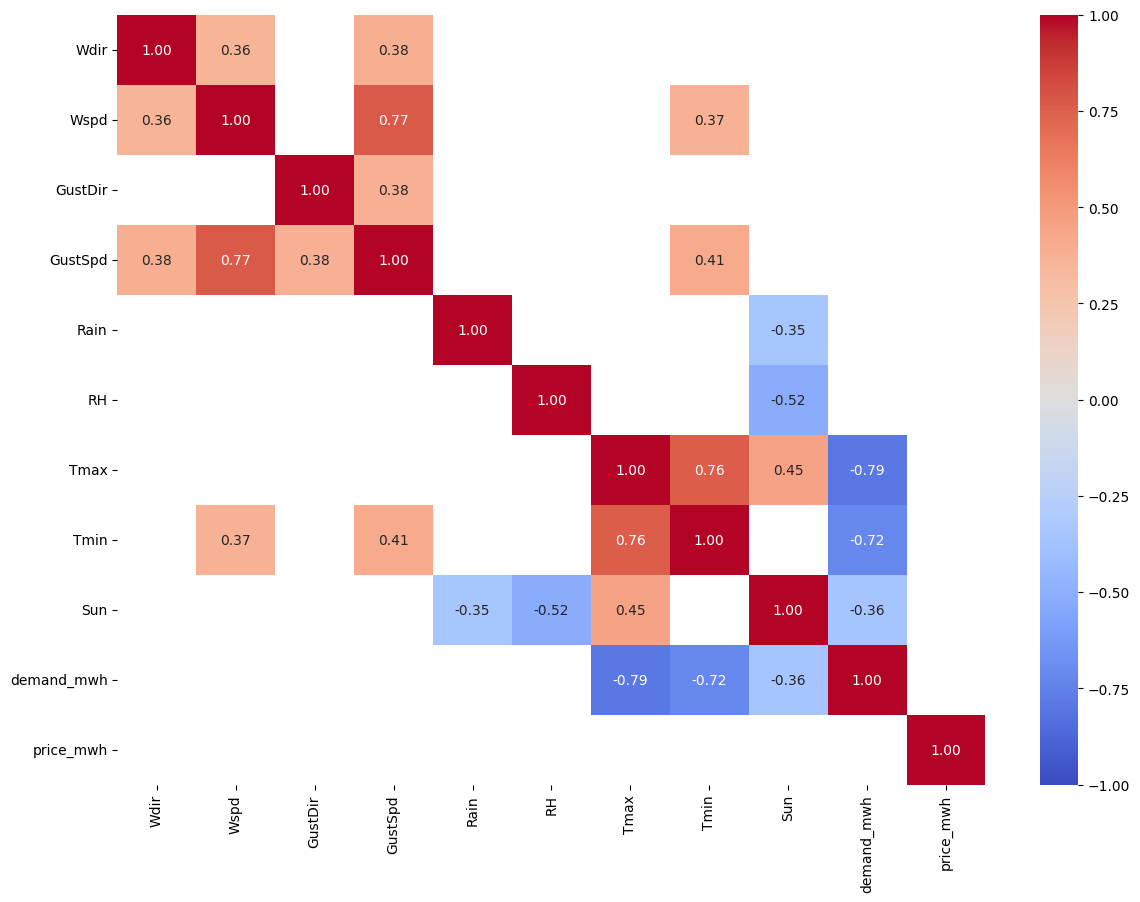

In [17]:
numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns

matrix = df[numerical].corr().where((abs(df[numerical].corr()) >=0.35)).isna()
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap (df[numerical].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax)